# Chapter 5 - Ex2: NBA Players
## Cho dữ liệu nba_2013.csv
## Sử dụng thuật toán KNN để dự đoán số điểm (points) mà các cầu thủ NBA ghi được trong mùa giải 2013-2014.

## Mỗi hàng trong dữ liệu chứa thông tin về player thực hiện trong mùa giải 2013-2014 NBA:
+ player -- tên player
+ pos -- vị trí của player
+ g -- số trận mà player đã tham gia
+ gs -- số trận mà player đã bắt đầu
+ pts -- tổng số point mà player đã ghi được)

## Yêu cầu
1. Đọc dữ liệu và gán cho biến data. Xem thông tin data: shape, type, head(), tail(), info. Tiền xử lý dữ liệu (nếu cần)
2. Tạo inputs data với các cột không có giá trị null trừ cột 'player', 'bref_team_id', 'season','season_end', 'pts', và outputs data với 1 cột là 'pts' 
    + => Vẽ biểu đồ quan sát mối liên hệ giữa inputs và outputs data
3. Từ inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 80:20
4. Thực hiện KNN với X_train, y_train
5. Dự đoán y từ X_test => so sánh với y_test
6. Xem kết quả => Nhận xét model
7. Ghi model nếu model phù hợp

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)

## <span style='color:yellow'> 1. Đọc dữ liệu và gán cho biến data. Xem thông tin data: shape, type, head(), tail(), info. Tiền xử lý dữ liệu (nếu cần)
## <span style='color:yellow'> 2. Tạo inputs data với các cột không có giá trị null trừ cột 'player', 'bref_team_id', 'season','season_end', 'pts', và outputs data với 1 cột là 'pts' 
## => Vẽ biểu đồ quan sát mối liên hệ giữa inputs và outputs data

In [6]:
nba = pd.read_csv('Data/nba_2013.csv')
nba

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,40,188,0.212766,305,620,0.491935,0.452,209,326,0.641,69,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,135,350,0.385714,252,539,0.467532,0.511,235,285,0.825,29,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,90,292,0.308219,492,991,0.496468,0.489,163,229,0.712,166,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,0,1,0.000000,172,403,0.426799,0.426,146,200,0.730,118,235,353,92,40,41,87,170,490,2013-2014,2013


In [28]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [8]:
nba = nba.dropna()
nba.shape

(403, 31)

In [18]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.0
mean,26.488834,57.660050,28.727047,1383.034739,217.535980,482.496278,0.432630,47.208437,131.208437,0.284293,170.327543,351.287841,0.466605,0.482742,103.635236,135.411911,0.742362,57.538462,176.260546,233.799007,131.161290,44.736973,24.622829,80.898263,114.925558,585.915633,2013.0
std,4.281947,22.683877,30.412503,873.264134,172.724338,368.948872,0.073309,52.259030,135.247576,0.152235,149.694239,298.878478,0.079557,0.073659,107.632290,135.714560,0.139693,61.895678,143.296787,197.515808,135.108216,34.806934,30.644189,63.316249,68.811621,474.422805,0.0
min,19.000000,2.000000,0.000000,7.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,41.000000,1.000000,587.500000,69.500000,162.000000,0.401000,3.000000,14.500000,0.236695,47.000000,106.000000,0.435843,0.454000,24.000000,32.500000,0.682500,15.500000,65.000000,86.000000,33.000000,16.000000,5.000000,28.500000,57.500000,182.000000,2013.0
50%,26.000000,65.000000,13.000000,1396.000000,183.000000,410.000000,0.435000,28.000000,88.000000,0.330827,137.000000,291.000000,0.471591,0.487000,66.000000,90.000000,0.765000,36.000000,150.000000,194.000000,82.000000,40.000000,14.000000,66.000000,121.000000,490.000000,2013.0
75%,29.000000,77.000000,61.000000,2157.500000,336.000000,721.500000,0.470000,74.000000,212.000000,0.375000,254.000000,520.500000,0.508404,0.523500,153.500000,196.500000,0.822500,73.500000,242.000000,323.500000,192.500000,65.000000,32.000000,120.500000,165.000000,909.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,0.659000,261.000000,615.000000,1.000000,706.000000,1408.000000,0.750000,0.662000,703.000000,805.000000,1.000000,440.000000,739.000000,1071.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [ ]:
x = nba.drop(['player', 'bref_team_id', 'season','season_end', 'pts'], axis = 1)
y = nba['pts']

In [12]:
#sbn.pairplot(data = nba.drop(['player', 'bref_team_id', 'season','season_end'], axis = 1), kind='reg')
#plt.show()

## <span style='color:yellow'> 3. Từ inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 80:20
## <span style='color:yellow'> 4. Thực hiện KNN với X_train, y_train
## <span style='color:yellow'> 5. Dự đoán y từ X_test => so sánh với y_test
## <span style='color:yellow'> 6. Xem kết quả => Nhận xét model
## <span style='color:yellow'> 7. Ghi model nếu model phù hợp

K = 2 ___ Accuracy Test = 0.956 ___ RMSE = 95.4751114876555
K = 3 ___ Accuracy Test = 0.957 ___ RMSE = 94.74761073171712
K = 4 ___ Accuracy Test = 0.963 ___ RMSE = 86.99982261937359
K = 5 ___ Accuracy Test = 0.963 ___ RMSE = 87.1930765175343
K = 6 ___ Accuracy Test = 0.966 ___ RMSE = 83.58249582108539
K = 7 ___ Accuracy Test = 0.965 ___ RMSE = 85.56654374765363
K = 8 ___ Accuracy Test = 0.962 ___ RMSE = 87.9973103019085
K = 9 ___ Accuracy Test = 0.960 ___ RMSE = 90.37993860835586
K = 10 ___ Accuracy Test = 0.956 ___ RMSE = 95.34274688048404
K = 11 ___ Accuracy Test = 0.954 ___ RMSE = 97.29195662539402
K = 12 ___ Accuracy Test = 0.953 ___ RMSE = 98.07907247808711
K = 13 ___ Accuracy Test = 0.955 ___ RMSE = 96.27177952879104
K = 14 ___ Accuracy Test = 0.955 ___ RMSE = 95.97984232918336
K = 15 ___ Accuracy Test = 0.954 ___ RMSE = 97.19564758498717
K = 16 ___ Accuracy Test = 0.952 ___ RMSE = 99.35608926946973
K = 17 ___ Accuracy Test = 0.953 ___ RMSE = 98.80224941200379
K = 18 ___ Accuracy

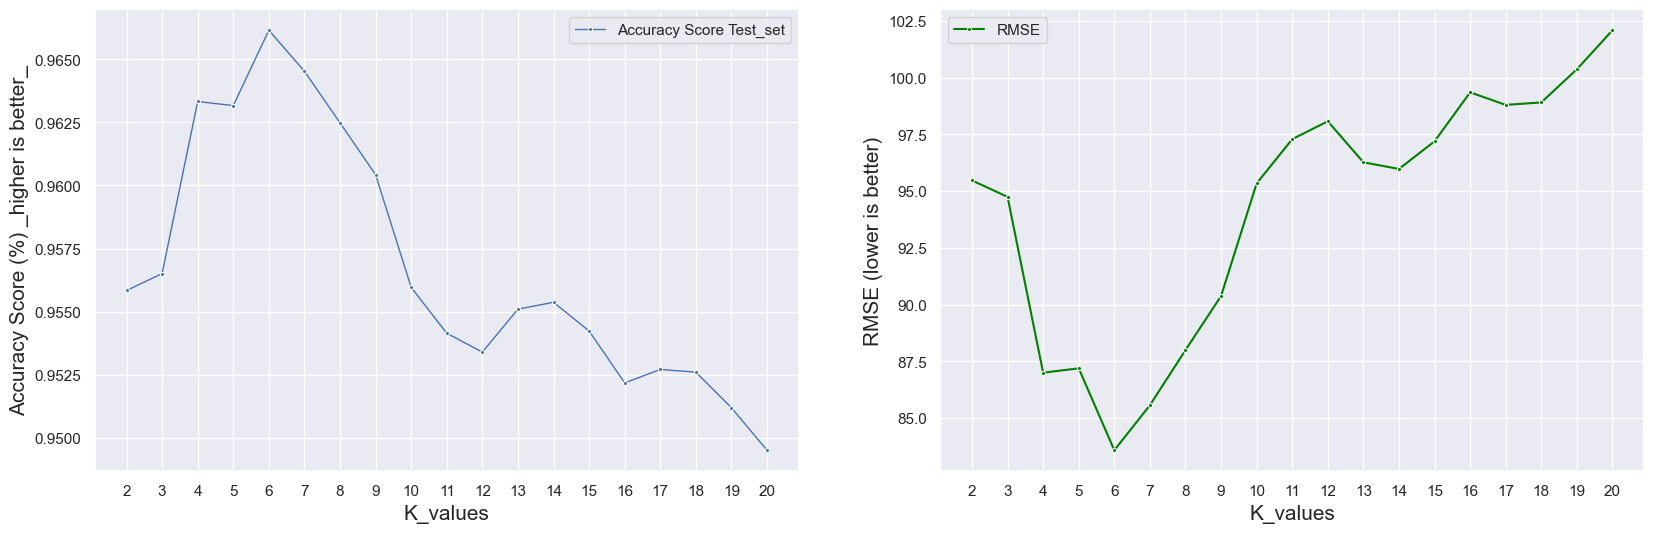


Choose K = 6 ___ Accuracy Test = 0.966 ___ RMSE = 83.58249582108539 


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

x = nba.drop(['player', 'bref_team_id', 'season','season_end', 'pts'], axis = 1)
y = nba['pts']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

lst_k = []
lst_acc_test = []
lst_rmse = []

for k in range(2,21):
    lst_k.append(k)
    
    knnR_pipe = Pipeline([
        ("Onehot_Encoder", make_column_transformer( (OneHotEncoder(handle_unknown='ignore', drop='first'), ['pos']), remainder='passthrough' )),
        ("KNN_Regressor",KNeighborsRegressor(n_neighbors=k))
         ])
    
    knnR_pipe.fit(x_train, y_train)

    y_test_pred =  knnR_pipe.predict(x_test)
    acc_test = knnR_pipe.score(x_test, y_test)
    lst_acc_test.append(acc_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lst_rmse.append(rmse)

    print(f'K = {k} ___ Accuracy Test = {acc_test:.3f} ___ RMSE = {rmse}')

print()

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sbn.lineplot(x = lst_k, y = lst_acc_test, label = 'Accuracy Score Test_set', marker='.', linewidth = 1)
plt.xticks(lst_k)
plt.xlabel('K_values', size=15)
plt.ylabel('Accuracy Score (%) _higher is better_', size=15)

plt.subplot(1,2,2)
sbn.lineplot(x = lst_k, y = lst_rmse, label = 'RMSE', color = 'green', marker = '.')
plt.xticks(lst_k)
plt.xlabel('K_values', size=15)
plt.ylabel('RMSE (lower is better)', size=15)
plt.show()

print('\nChoose K = 6 ___ Accuracy Test = 0.966 ___ RMSE = 83.58249582108539 ')

     Y_test_true  Y_test_predict
423         1465     1324.666667
78           485      368.833333
445           92       61.500000
111          529      513.333333
173           65       79.000000
..           ...             ...
15           436      318.666667
428         1488     1388.500000
350         1010      863.833333
56           197      210.000000
188          225      201.666667

[81 rows x 2 columns]

Accuracy Score = 0.966154023065689



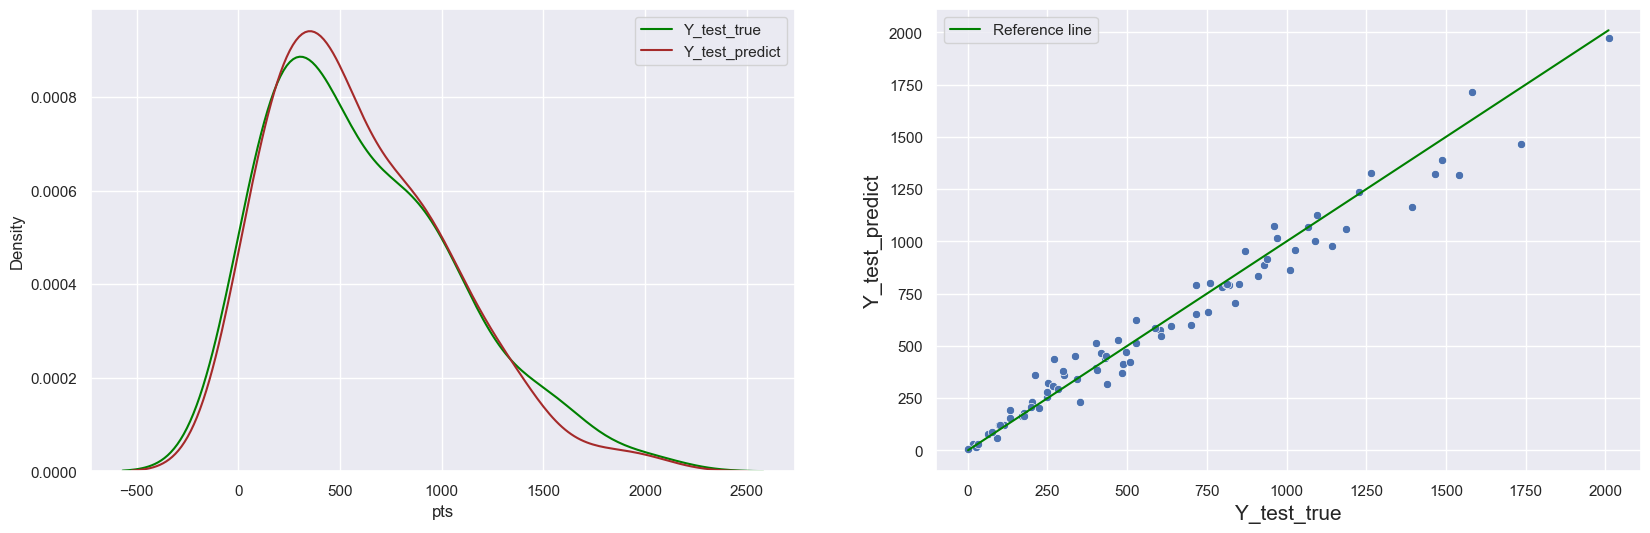


Comments: The model is good, accuracy score on test set > 0.96


In [75]:
x = nba.drop(['player', 'bref_team_id', 'season','season_end', 'pts'], axis = 1)
y = nba['pts']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

knnR_pipe = Pipeline([
    ("Onehot_Encoder", make_column_transformer( (OneHotEncoder(handle_unknown='ignore', drop='first'), ['pos']), remainder='passthrough' )),
    ("KNN_Regressor",KNeighborsRegressor(n_neighbors=6))
     ])

knnR_pipe.fit(x_train, y_train)

y_test_pred =  knnR_pipe.predict(x_test)

print(pd.DataFrame({"Y_test_true": y_test, "Y_test_predict":y_test_pred}))

print(f'\nAccuracy Score = {knnR_pipe.score(x_test, y_test)}')
print()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sbn.kdeplot(y_test, label = "Y_test_true", color = 'green')
sbn.kdeplot(y_test_pred, label = "Y_test_predict", color = 'brown')
plt.legend()

plt.subplot(1,2,2)
sbn.lineplot(x = [y_test.min(), y_test.max()], y = [y_test.min(), y_test.max()], label = 'Reference line', color = 'green')
sbn.scatterplot(x = y_test, y = y_test_pred)
plt.xlabel("Y_test_true", size=15)
plt.ylabel("Y_test_predict", size=15)
plt.show()

print('''\nComments: The model is good, accuracy score on test set > 0.96''')